In [341]:
#Loading the required libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [342]:
# load the csv file
df = pd.read_csv('/content/Loan data.csv')
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [343]:
#Checking Null values
#Missing values in decsending order
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [344]:
#the Id column is not needed, let's drop it for both test and train datasets
df.drop('Loan_ID',axis=1,inplace=True)
#checking the new shapes
print(f"training set (row, col): {df.shape}\n\ntesting set (row, col): {df.shape}")

training set (row, col): (614, 12)

testing set (row, col): (614, 12)


In [345]:
#filling the missing data
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    print(f"{col}:\n{df[col].value_counts()}\n","-"*50)
    df[col] = df[col].fillna(
    df[col].dropna().mode().values[0] )   

    
df.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{df[col].value_counts()}\n","-"*50)

Before filling missing values

 ################################################## 

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype

In [346]:
df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [347]:
df.shape

(614, 12)

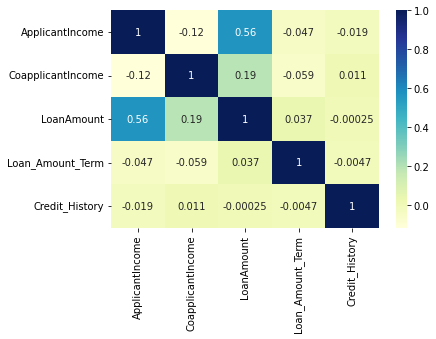

In [348]:
#plotting the correlation matrix
sns.heatmap(df.corr() ,cmap="YlGnBu",annot = True)
plt.show()

In [349]:
#Considering the independent variables alone for OLS method.
cols = df.columns
cols = [col.strip() for col in cols]
df.columns = cols
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [350]:
#Train - Test split data.
z1 = df['Credit_History']
z2 = df['CoapplicantIncome']
y = df['LoanAmount']
X = df['ApplicantIncome']
X_train, X_test, y_train, y_test, z1_train, z1_test, z2_train, z2_test = train_test_split(X, y, z1, z2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [357]:
# Add a constant to get an intercept. OLS method
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [373]:
#2 stage least difference model. 2SLS
model_first_stage = sm.OLS(z1_train, sm.add_constant(X_train)).fit()
X_train_slm = model_first_stage.fittedvalues

# Second stage regression
sls = sm.OLS(X_train_slm, z2_train).fit()

In [374]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const              108.289782
ApplicantIncome      0.006635
dtype: float64

In [359]:
#Predicting with test values.
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [360]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [361]:
y_pred.head()

253    125.945363
506    246.515532
365    149.532582
265    135.459870
260    148.650135
dtype: float64

In [362]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

68.37260407975

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


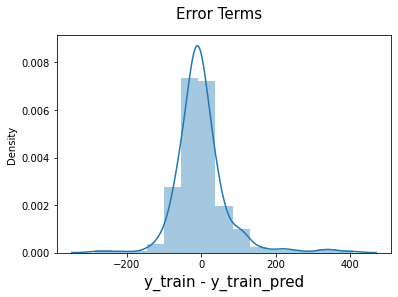

In [363]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [364]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.4543016569459086

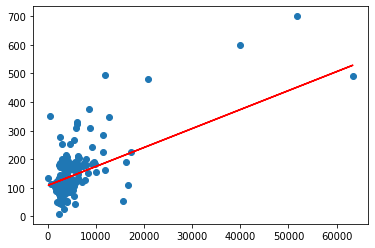

In [365]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 108.289782 - 8.395034e-07 * X_test, 'r')
plt.show()

In [366]:
sls.params

CoapplicantIncome    0.000212
dtype: float64

In [368]:
X_train_slm.params

const              8.623095e-01
ApplicantIncome   -8.395034e-07
dtype: float64

In [382]:
#Predicting with test values.
y_train_sls_pred = sls.predict(X_train_slm)
res1 = (y_train - y_train_sls_pred)

In [377]:
y_pred_sls = sls.predict(X_test)

In [378]:
y_pred_sls

253    0.563864
506    4.414497
365    1.317166
265    0.867727
260    1.288983
         ...   
368    1.340263
98     0.887434
310    0.618110
335    1.166082
302    1.059496
Length: 185, dtype: float64

In [379]:
y_test

253    279.0
506    480.0
365    133.0
265    151.0
260    330.0
       ...  
368    175.0
98     115.0
310     84.0
335     70.0
302    132.0
Name: LoanAmount, Length: 185, dtype: float64

In [380]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred_sls))

174.03946102931596

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


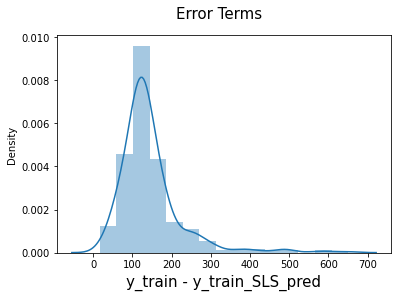

In [383]:
fig = plt.figure()
sns.distplot(res1, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_SLS_pred', fontsize = 15)         # X-label
plt.show()

In [384]:
r_squared_sls = r2_score(y_test, y_pred)
r_squared_sls

0.4543016569459086

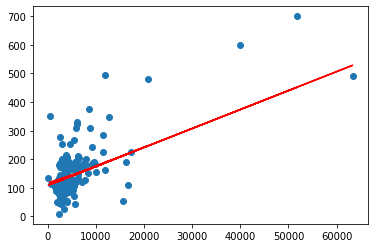

In [387]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 108.289782 + 0.006635 * X_test - 8.395034e-07 * z1_test + 0.000212 * z2_test, 'r')
plt.show()

In [388]:
#converting categorical values to numbers

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
df = df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(df.Dependents)

# dropping the previous Dependents column
df.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
df = pd.concat([df, Dependents_], axis = 1)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [390]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [391]:
LR = LogisticRegression()
LR.fit(X_train_LR, y_train_LR)
y_predict_LR = LR.predict(X_test_LR)

#  prediction Summary by species
print(classification_report(y_test_LR, y_predict_LR))

# Accuracy score
LR_SC = accuracy_score(y_predict_LR,y_test_LR)
print('accuracy is',accuracy_score(y_predict_LR,y_test_LR))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.76       185

accuracy is 0.7891891891891892


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
